<a href="https://colab.research.google.com/github/annisajumalia/Data_Mining_Prediksi/blob/main/KNN_dan_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALGORITMA KNN

In [61]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
data_location='Dataset_Produk.csv'
row_data = pd.read_csv(data_location)

In [62]:
row_data.shape

(42, 5)

In [63]:
#Menampilkan dataset
#data = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
data = pd.read_csv("Dataset_Produk.csv")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 42


,No.,NAMA BARANG,Harga,Stok,Terlaris
0,1,Sunlight,9900,810,NaN
1,2,Baby Happy 30'S,53500,12,NaN
2,3,Baby Happy 34S,53500,12,NaN
3,4,Vixal Pembersih 175mL,3000,250,NaN
4,5,Wipol clasic 220mL,2000,15,NaN


In [64]:
#Informasi pada fitur
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          42 non-null     int64  
 1   NAMA BARANG  42 non-null     object 
 2   Harga        42 non-null     int64  
 3   Stok         42 non-null     int64  
 4   Terlaris     0 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.8+ KB


In [65]:
data = row_data.drop(columns=['NAMA BARANG'])
data.describe()

,No.,Harga,Stok,Terlaris
count,42.000000,42.000000,42.000000,0.0
mean,21.500000,19439.285714,149.261905,NaN
std,12.267844,22312.381818,299.071495,NaN
min,1.000000,1450.000000,0.000000,NaN
25%,11.250000,3200.000000,13.000000,NaN
50%,21.500000,12000.000000,26.000000,NaN
75%,31.750000,24500.000000,107.000000,NaN
max,42.000000,79900.000000,1511.000000,NaN


In [95]:
features = ['Harga']
x = data[features]
y = data['Stok']
x.shape, y.shape

((42, 1), (42,))

In [96]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 50)

In [97]:
test_y.shape

(11,)

In [98]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors=2)  # Adjust the number of neighbors based on your dataset

# Training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# Test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print('MSE:', score, '\n', 'Accuracy:', acc1)

MSE: 181124.95454545456 
 Accuracy: 0.1465539988571457


In [99]:
def Elbow(K):
  #initiating an empy list
  test_mse =[]

  #train model for every value of K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)

  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

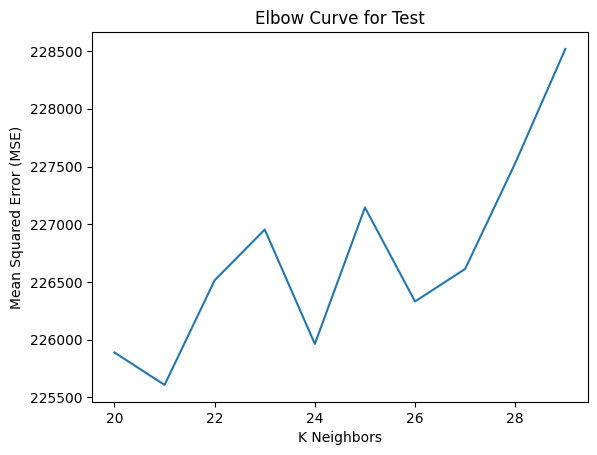

In [100]:
K = range(20, 30)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [79]:
new_model = KNN_Reg(n_neighbors=1)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n', 'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 0.21441954500627247 
 Accuracy of old model (%): 9.169291906147015 
 Improvement (%): -8.954872361140742


ALGORITMA NAIVE BAYES

In [102]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
data_location='Dataset_Produk.csv'
row_data = pd.read_csv(data_location)

In [103]:
row_data.shape

(42, 5)

In [104]:
data = pd.read_csv("Dataset_Produk.csv")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 42


,No.,NAMA BARANG,Harga,Stok,Terlaris
0,1,Sunlight,9900,810,NaN
1,2,Baby Happy 30'S,53500,12,NaN
2,3,Baby Happy 34S,53500,12,NaN
3,4,Vixal Pembersih 175mL,3000,250,NaN
4,5,Wipol clasic 220mL,2000,15,NaN


In [105]:
#Informasi pada fitur
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          42 non-null     int64  
 1   NAMA BARANG  42 non-null     object 
 2   Harga        42 non-null     int64  
 3   Stok         42 non-null     int64  
 4   Terlaris     0 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.8+ KB


In [106]:
data = row_data.drop(columns=['NAMA BARANG'])
data.describe()

,No.,Harga,Stok,Terlaris
count,42.000000,42.000000,42.000000,0.0
mean,21.500000,19439.285714,149.261905,NaN
std,12.267844,22312.381818,299.071495,NaN
min,1.000000,1450.000000,0.000000,NaN
25%,11.250000,3200.000000,13.000000,NaN
50%,21.500000,12000.000000,26.000000,NaN
75%,31.750000,24500.000000,107.000000,NaN
max,42.000000,79900.000000,1511.000000,NaN


In [107]:
features = ['Harga']
x = data[features]
y = data['Stok']
x.shape, y.shape

((42, 1), (42,))

In [108]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 50)

In [109]:
test_y.shape

(11,)

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error as mse

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_x)
X_test = scaler.transform(test_x)

# Buat model Naive Bayes
model = GaussianNB()

# Training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# Test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print('MSE:', score, '\n', 'Accuracy:', acc1)

MSE: 154540.45454545456 
 Accuracy: 0.18181818181818182
